# Importing libraries

In [80]:
import cmath
from cmath import pi as pi
from math import cos as cos
from math import sin as sin

import matplotlib.pyplot as plt
import numpy as np

# DFT functions

In [81]:
def dft(inner):
    out = []
    iters = (0, 0)
    length = len(inner)

    for m in range(length):
        temp = complex(.0, .0)
        for n in range(length):
            arg = -2 * pi * m * n / length
            temp = temp + complex(inner[n] * cos(arg), inner[n] * sin(arg))
            iters = (iters[0] + 2, iters[1] + 2)

        out.append(temp)

    return (out,iters)

def idft(inner):
    out = []
    length = len(inner)

    for m in range(length):
        temp = complex(.0, .0)
        for n in range(length):
            arg = 2 * pi * m * n / length
            temp = temp + complex(inner[n] * cos(arg), inner[n] * sin(arg))

        out.append(temp / length)

    return out

# FFT functions

In [82]:
def _w(k, n):
    if k % n == 0:
        return 1
    arg = -2 * pi * k / n
    return complex(cos(arg), sin(arg))

def fft(inner, iters=(0,0)):
    out = []
    length = len(inner)

    if(length == 2):
        out.append(inner[0] + inner[1])
        out.append(inner[0] - inner[1])
        iters = (iters[0] + 2, iters[1])

    else:
        even = [inner[x] for x in range(0, len(inner), 2)]
        odd = [inner[x] for x in range(1, len(inner), 2)]

        even, iters = fft(even, iters)
        odd, iters = fft(odd, iters)

        out = [None] * length
        for i in range(0, int(length / 2)):
            out[i] = even[i] + _w(i, length) * odd[i]
            out[i + int(length / 2)] = even[i] - _w(i, length) * odd[i]
            iters =(iters[0] + 1, iters[1] + 2)

    return (out, iters)


def ifft(inner):
    length = len(inner)
    out = []

    if (length == 2):
        out.append(complex(inner[0] + inner[1]))
        out.append(complex(inner[0] - inner[1]))

    else:
        even = [inner[x] for x in range(0, len(inner), 2)]
        odd = [inner[x] for x in range(1, len(inner), 2)]

        even = ifft(even)
        odd = ifft(odd)

        out = [None] * length
        for i in range(0, int(length / 2)):
            out[i] = even[i] + _w(i, length).conjugate() * odd[i]
            out[i + int(length / 2)] = even[i] - _w(i, length).conjugate() * odd[i]

    return out

# Initializing&Source plot

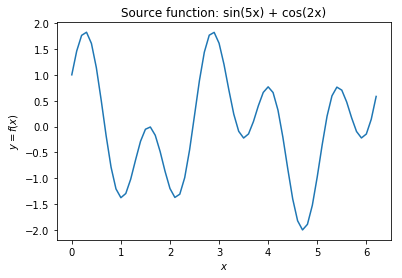

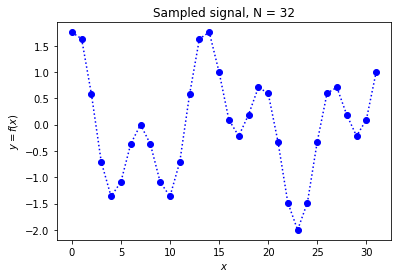

In [87]:
func = lambda x: sin(5 * x) + cos(2 * x) 

def sampled(func, n, period=(2 * pi)):
    out = []
    for i in range(n):
        out.append(func(period * (i + 1) / n))

    return out

N = 32
inner = sampled(func, N)

spectrum, iters_dft = dft(inner)

x = np.arange(0, 2 * pi, 0.1)  
y = np.sin(5 * x) + np.cos(2 * x)
iters_dft = 2**10
iters_fft_ = 2*80

plt.plot(x, y)
plt.title('Source function: sin(5x) + cos(2x)')
plt.xlabel(r'$x$')
plt.ylabel(r'$y = f(x)$')
plt.show()
plt.close()

plt.plot(np.arange(N), inner, "b:o")
plt.title('Sampled signal, N = 32')
plt.xlabel(r'$x$')
plt.ylabel(r'$y = f(x)$')
plt.show()
plt.close()

# DFT

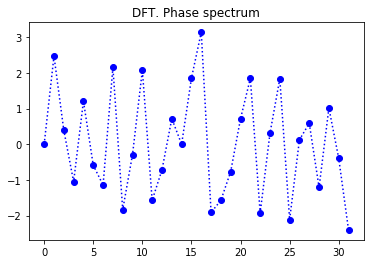

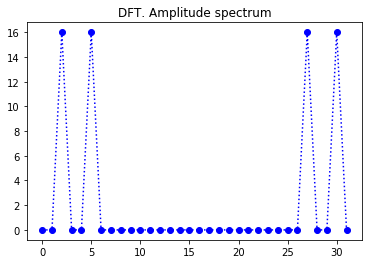

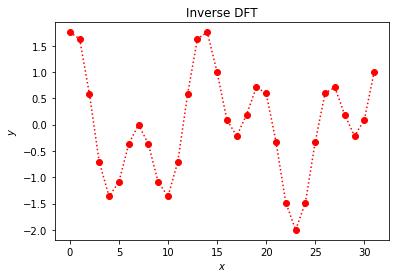

=== Number of operations using DFT ===
Sum: 1024, mul: 1024


In [96]:
# DFT  
plt.plot(np.arange(N), [cmath.polar(x)[1] for x in spectrum], "b:o")
plt.title('DFT. Phase spectrum')
#plt.xlabel(r'$f$')
plt.show()
plt.close()

plt.plot(np.arange(N), [cmath.polar(x)[0] for x in spectrum], "b:o")
plt.title('DFT. Amplitude spectrum')
#plt.xlabel(r'$f$')
plt.show()
plt.close()

plt.plot(np.arange(N),[x.real for x in idft(spectrum)], "r:o")
plt.title('Inverse DFT')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()
plt.close()

sum_count_dft = iters_dft
mul_count_dft = iters_dft
print("=== Number of operations using DFT ===")
print("Sum: %d, mul: %d" % (sum_count_dft, mul_count_dft))

# FFT

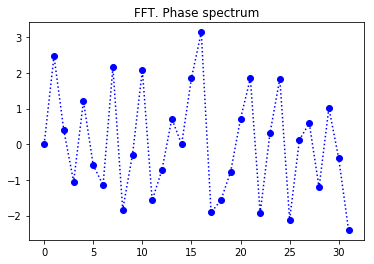

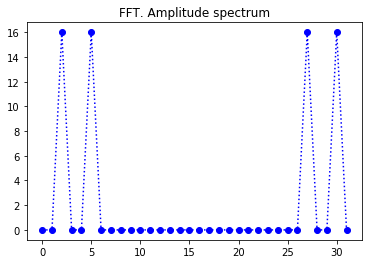

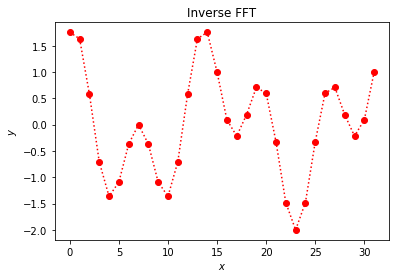

=== Number of operations using FFT ===
Sum: 160, mul: 80


In [98]:
#FFT  
plt.plot(np.arange(N), [cmath.polar(x)[1] for x in spectrum], "b:o")
plt.title('FFT. Phase spectrum')
#plt.xlabel(r'$f$')
plt.show()
plt.close()

spectrum, iters_fft = fft(inner)

plt.plot(np.arange(N), [cmath.polar(x)[0] for x in spectrum], "b:o")
plt.title('FFT. Amplitude spectrum')
#plt.xlabel(r'$f$')
plt.show()
plt.close()

plt.plot(np.arange(N), [x.real / N for x in ifft(spectrum)], "r:o")
plt.title('Inverse FFT')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()
plt.close()

sum_count_fft = iters_fft_
mul_count_fft = iters_fft_/2
print("=== Number of operations using FFT ===")
print("Sum: %d, mul: %d" % (sum_count_fft, mul_count_fft))   